In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import netCDF4
import xarray as xr
import hmp
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
import multiprocessing
import os
import random
import mne
from tqdm.notebook import tqdm
DATA_PATH = Path(os.getenv("DATA_PATH"))

#### New version

In [5]:
sfreq = 250  # For resampling

eeg_path = DATA_PATH / "sat2/preprocessed_500hz/"
subj_names = [
    x.split("_")[0] for x in os.listdir(eeg_path)
]  # in x and 'S14' not in x] #pbm with
subj_names = [subj for subj in subj_names]
subj_names.sort()
# subj_names = ['S11', 'S9', 'S10']
# subj_names = [subj for subj in subj_names if subj in ['S9', 'S10', 'S11']]
subj_files = [str(eeg_path) + "/" + x + "_epo.fif" for x in subj_names]

Processing participant /workspace/data_local/sat2/preprocessed_500hz/S1_epo.fif's epoched eeg


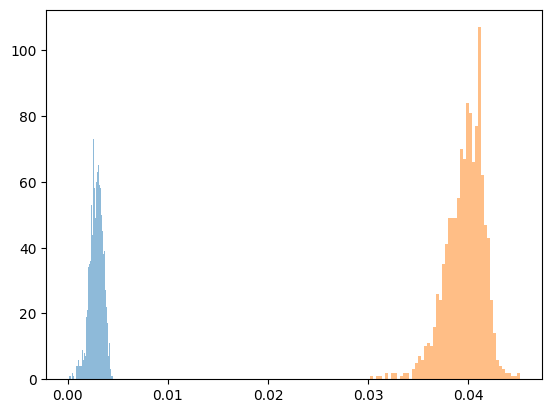

Dropped 19 epochs: 12, 23, 31, 32, 49, 60, 73, 95, 107, 167, 183, 669, 1276, 1327, 1344, 1371, 1381, 1397, 1450
13 trial rejected based on threshold of 0.0001
2342 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S1_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S10_epo.fif's epoched eeg


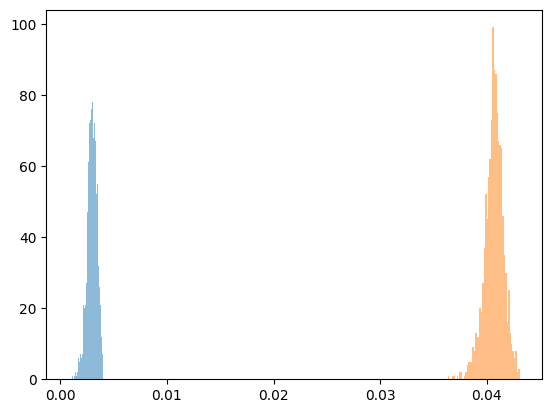

Dropped 5 epochs: 23, 76, 85, 607, 1114
82 trial rejected based on threshold of 0.0001
2360 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S10_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S11_epo.fif's epoched eeg


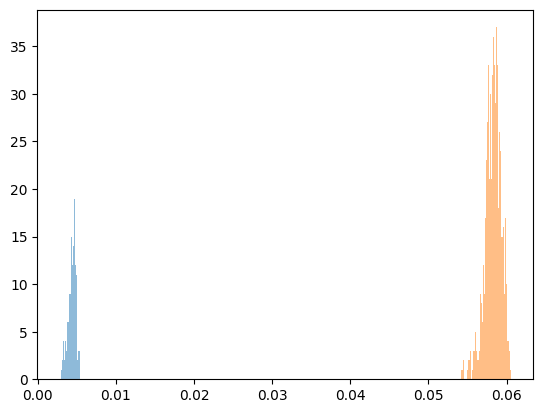

Dropped 2 epochs: 92, 1014
132 trial rejected based on threshold of 0.0001
2310 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S11_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S12_epo.fif's epoched eeg


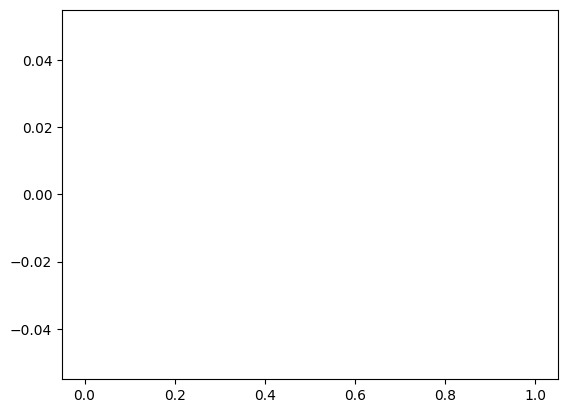

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Dropped 0 epochs: 
6 trial rejected based on threshold of 0.0001
2442 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S12_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S13_epo.fif's epoched eeg


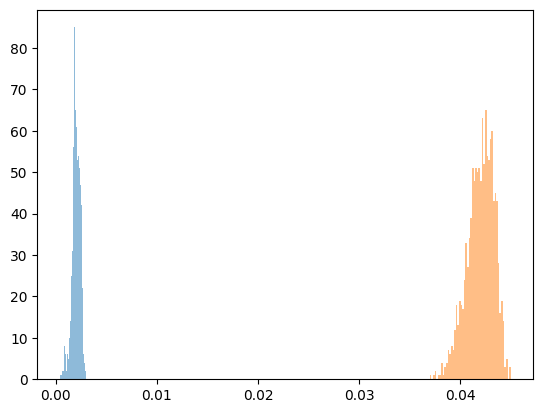

Dropped 18 epochs: 37, 128, 129, 243, 254, 260, 303, 369, 400, 465, 530, 741, 996, 1106, 1589, 1692, 2176, 2310
2 trial rejected based on threshold of 0.0001
2427 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S13_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S14_epo.fif's epoched eeg


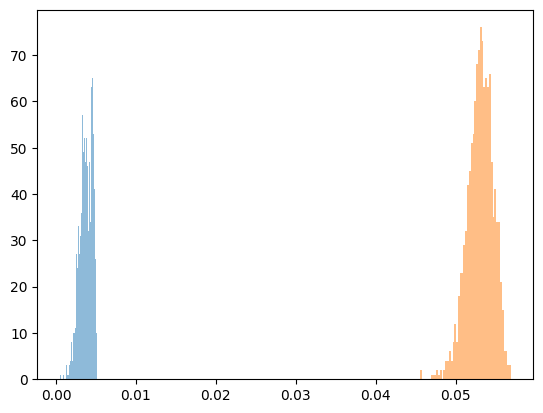

Dropped 8 epochs: 6, 117, 197, 223, 402, 481, 577, 2020
48 trial rejected based on threshold of 0.0001
2392 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S14_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S15_epo.fif's epoched eeg


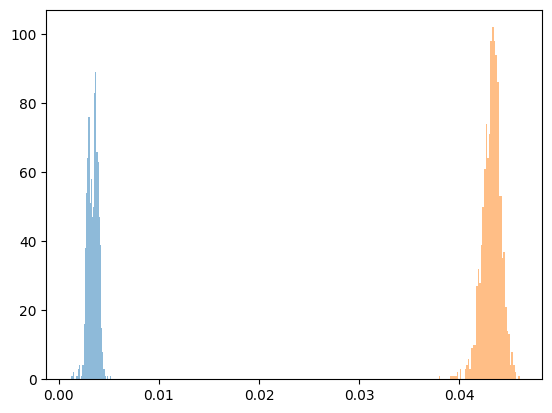

Dropped 6 epochs: 126, 303, 1148, 1580, 2326, 2349
5 trial rejected based on threshold of 0.0001
2437 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S15_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S16_epo.fif's epoched eeg


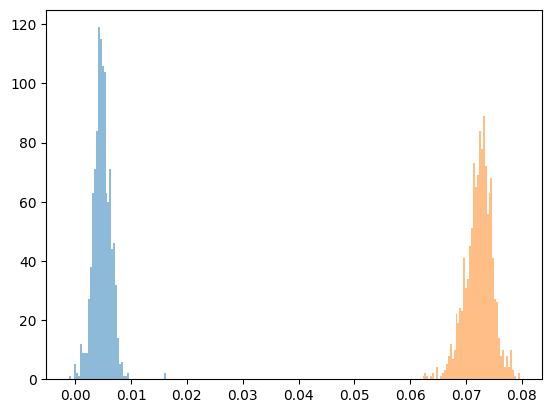

Dropped 15 epochs: 199, 488, 502, 592, 593, 594, 1529, 1688, 1735, 1736, 1966, 2092, 2135, 2160, 2169
26 trial rejected based on threshold of 0.0001
2306 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S16_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S17_epo.fif's epoched eeg


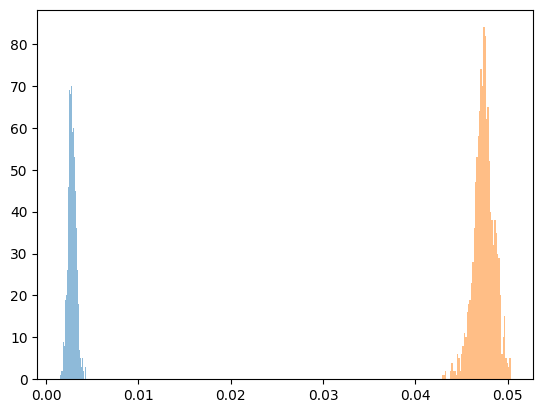

Dropped 15 epochs: 16, 137, 175, 184, 208, 214, 721, 857, 1712, 1874, 1890, 1951, 2006, 2121, 2437
30 trial rejected based on threshold of 0.0001
2397 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S17_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S18_epo.fif's epoched eeg


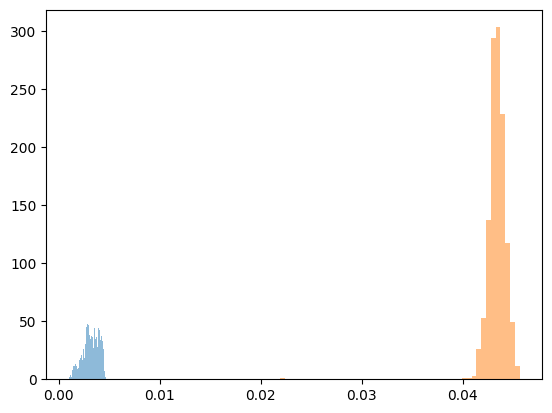

Dropped 37 epochs: 16, 30, 33, 37, 41, 51, 69, 83, 89, 110, 120, 123, 138, 188, 192, 206, 210, 219, 225, 233, 238, 241, 245, 277, 283, 289, 291, 725, 769, 786, 1253, 1627, 2063, 2217, 2262, 2272, 2445
10 trial rejected based on threshold of 0.0001
2401 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S18_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S2_epo.fif's epoched eeg


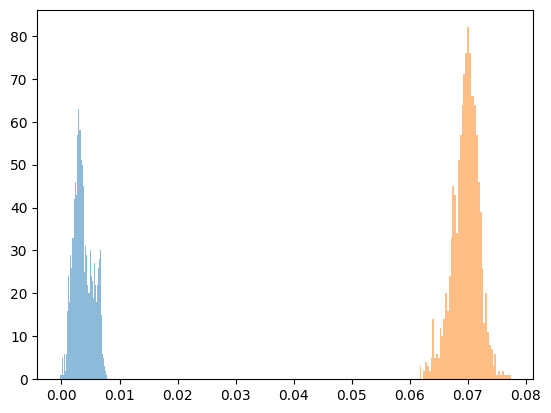

Dropped 22 epochs: 231, 232, 257, 262, 264, 272, 825, 853, 854, 858, 880, 901, 1281, 1282, 1428, 1437, 1483, 1484, 1952, 1959, 1965, 2055
684 trial rejected based on threshold of 0.0001
1735 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S2_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S20_epo.fif's epoched eeg


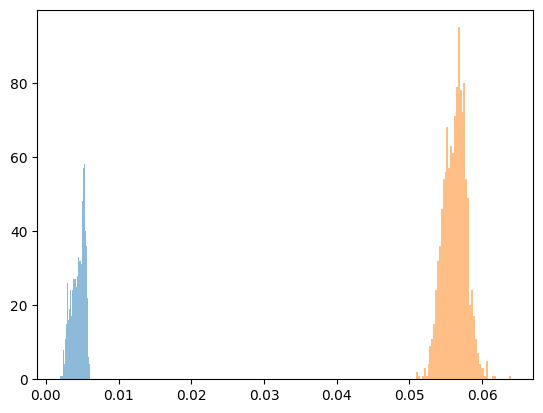

Dropped 28 epochs: 394, 669, 945, 963, 986, 1034, 1046, 1105, 1109, 1158, 1181, 1440, 1446, 1452, 1572, 1597, 1752, 1790, 1861, 1929, 1998, 2144, 2155, 2189, 2257, 2285, 2381, 2412
37 trial rejected based on threshold of 0.0001
2376 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S20_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S3_epo.fif's epoched eeg


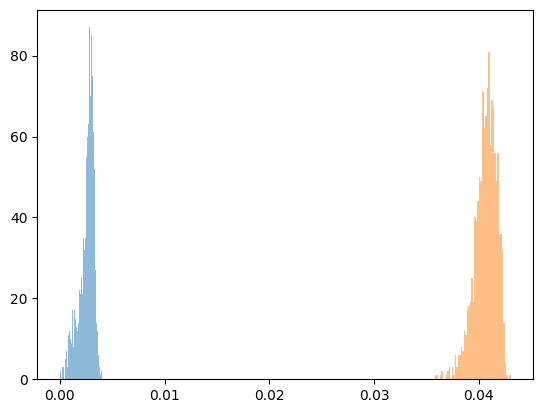

Dropped 7 epochs: 834, 852, 862, 1253, 1994, 2035, 2050
11 trial rejected based on threshold of 0.0001
2422 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S3_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S4_epo.fif's epoched eeg


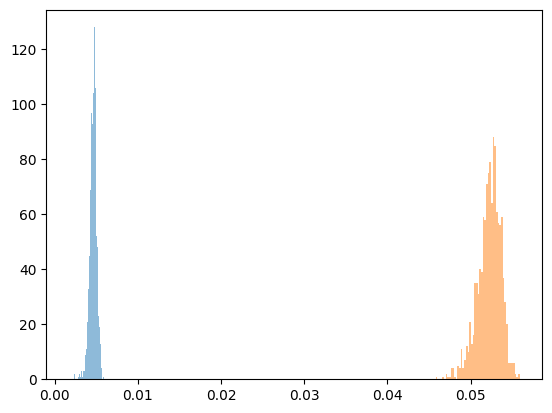

Dropped 12 epochs: 150, 436, 599, 1228, 1270, 1319, 1335, 1395, 1838, 1968, 2034, 2062
436 trial rejected based on threshold of 0.0001
2000 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S4_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S5_epo.fif's epoched eeg


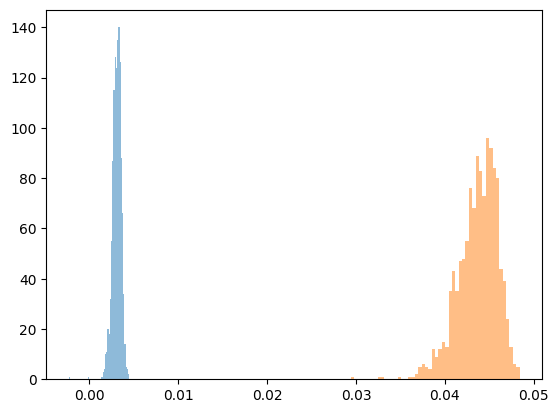

Dropped 10 epochs: 128, 138, 139, 159, 431, 595, 1687, 1846, 1958, 2143
9 trial rejected based on threshold of 0.0001
2428 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S5_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S6_epo.fif's epoched eeg


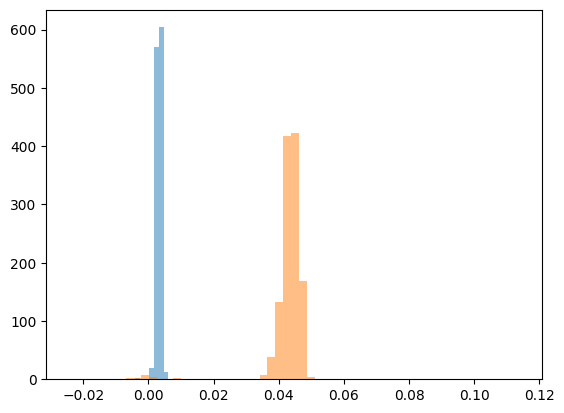

Dropped 22 epochs: 22, 141, 198, 634, 669, 670, 671, 683, 684, 724, 956, 1137, 1538, 1574, 1601, 1660, 1689, 1718, 2026, 2274, 2281, 2390
56 trial rejected based on threshold of 0.0001
2369 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S6_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S7_epo.fif's epoched eeg


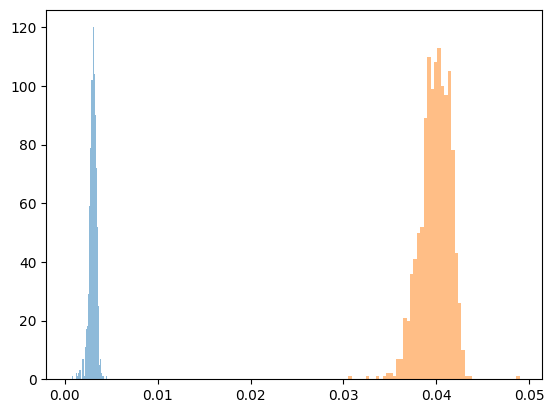

Dropped 31 epochs: 20, 32, 78, 558, 593, 610, 751, 810, 1260, 1261, 1275, 1284, 1293, 1298, 1304, 1319, 1327, 1648, 1655, 1684, 1703, 1704, 1717, 1758, 1782, 1785, 1825, 1854, 1880, 2076, 2081
84 trial rejected based on threshold of 0.0001
2291 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S7_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S8_epo.fif's epoched eeg


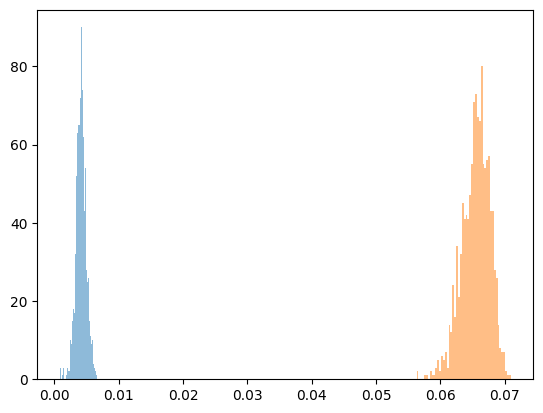

Dropped 15 epochs: 412, 421, 1175, 1194, 1249, 1283, 1323, 1361, 1384, 1663, 1911, 2074, 2121, 2247, 2437
177 trial rejected based on threshold of 0.0001
2249 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S8_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S9_epo.fif's epoched eeg


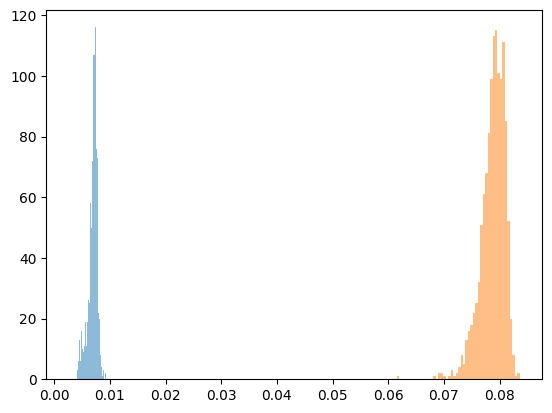

Dropped 0 epochs: 
14 trial rejected based on threshold of 0.0001
2434 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S9_epo.fif


In [8]:
epoch_data = hmp.utils.read_mne_data(
    subj_files,
    epoched=True,
    sfreq=sfreq,
    rt_col="rt",
    scale=1,
    lower_limit_RT=0.1,
    # upper_limit_RT=2.5,
    reject_threshold=1e-4,
    high_pass=1,
    verbose=False,
    subj_idx=subj_names,
    offset_after_resp=0.25,
    offset_before_stim=0.25,
    drop_force=True,
)
# Change epoch_data.offset to 0.05 seconds (12 samples), and add epoch_data.extra_offset with remainder
tmp_offset = epoch_data.offset
epoch_data = epoch_data.assign_attrs({'offset': 0, 'extra_offset': tmp_offset - 0})

In [9]:
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_250hz.nc')

#### DEPRECATED

In [ ]:
# cpus = multiprocessing.cpu_count()
# print(cpus)
# cpus = 1  # if not enough RAM to load all participants data, better reduce the number of processes

force_id = {"low": 1, "high": 2}
stim_id = {
    "accuracy/left/1": 211,
    "accuracy/left/2": 212,
    "accuracy/left/3": 213,
    "accuracy/right/1": 221,
    "accuracy/right/2": 222,
    "accuracy/right/3": 223,
    "speed/left/1": 111,
    "speed/left/2": 112,
    "speed/left/3": 113,  # conditions in the experiment
    "speed/right/1": 121,
    "speed/right/2": 122,
    "speed/right/3": 123,
}  # used for segmentation
resp_id = {"r_left": 100, "r_right": 200}  # Response events
# COMmenting low out might filter out low but also might mess up later
event_id = {
    "low/accuracy/left/1": 1211,
    "low/accuracy/left/2": 1212,
    "low/accuracy/left/3": 1213,
    "low/accuracy/right/1": 1221,
    "low/accuracy/right/2": 1222,
    "low/accuracy/right/3": 1223,
    "low/speed/left/1": 1111,
    "low/speed/left/2": 1112,
    "low/speed/left/3": 1113,  # conditions in the experiment
    "low/speed/right/1": 1121,
    "low/speed/right/2": 1122,
    "low/speed/right/3": 1123,
    "high/accuracy/left/1": 2211,
    "high/accuracy/left/2": 2212,
    "high/accuracy/left/3": 2213,
    "high/accuracy/right/1": 2221,
    "high/accuracy/right/2": 2222,
    "high/accuracy/right/3": 2223,
    "high/speed/left/1": 2111,
    "high/speed/left/2": 2112,
    "high/speed/left/3": 2113,  # conditions in the experiment
    "high/speed/right/1": 2121,
    "high/speed/right/2": 2122,
    "high/speed/right/3": 2123,
}

sfreq = 250  # For resampling

eeg_path = DATA_PATH / "sat2/preprocessed_500hz/"
subj_names = [
    x.split("_")[0] for x in os.listdir(eeg_path)
]  # in x and 'S14' not in x] #pbm with
subj_names = [subj for subj in subj_names]
subj_names.sort()
subj_files = [str(eeg_path) + "/" + x + "_epo.fif" for x in subj_names]
# Filter out first two participants for testing

#### ALL PARTICIPANTS

In [ ]:
epoch_data

In [2]:
epoch_data = xr.load_dataset(DATA_PATH / 'sat2/data_250hz.nc')

In [4]:
new_data = epoch_data.where(epoch_data['force'] == 'low', drop=True)

In [5]:
new_data.to_netcdf(DATA_PATH / 'sat2/data_250hz_low.nc')

In [ ]:
# CHECK IF S14 loaded in has significantly less trials (25%)

In [ ]:
# save_file = "epoch_data_FEEG_500Hz.nc"
events_corrected = []
epoch_data = []
#subset subj_files for smaller group
for participant in tqdm(subj_files):
    raw = mne.io.read_raw_fif(participant, preload=False, verbose=False)
    events = mne.find_events(raw, verbose=False)
    events[:, 2] = events[:, 2] - events[:, 1]  # correct events values
    i = 0
    while i < len(events):
        if events[i, 2] in force_id.values():  # if events is condition trigger
            events[i + 1, 2] = int(
                str(events[i, 2]) + str(events[i + 1, 2])
            )  # places condition trigger on stimulus trigger (no photodiode used yet)
            events[i, 2] = 0
            i += 2
        else:
            i += 1
    events_values = np.concatenate(
        [
            np.array([x for x in event_id.values()]),
            np.array([x for x in resp_id.values()]),
        ]
    )
    events_wresp = np.array([list(x) for x in events if x[2] in events_values])
    events_corrected.append(events_wresp)
    # print("Starting mp now")
    epoch_data_participant = hmp.utils.read_mne_data(
        pfiles=participant,
        event_id=event_id,
        resp_id=resp_id,
        epoched=False,
        sfreq=sfreq,
        subj_idx=None,
        metadata=None,
        events_provided=events_wresp,
        rt_col="rt",
        rts=None,
        verbose=True,
        tmin=-0.25,
        tmax=2.5,
        offset_after_resp=0.30,
        offset_before_stim=0.25,
        high_pass=1,
        low_pass=None,
        pick_channels="eeg",
        baseline=(None, 0),
        upper_limit_RT=2.5,
        lower_limit_RT=0.25,
    )
    epoch_data.append(epoch_data_participant)
del events, events_wresp, events_values, events_corrected

epoch_data = xr.concat(
    epoch_data,
    pd.Series(subj_names, name="participant"),
    fill_value={"event": "", "data": np.nan},
)
# Change epoch_data.offset to 0.05 seconds (12 samples), and add epoch_data.extra_offset with remainder
tmp_offset = epoch_data.offset
epoch_data = epoch_data.assign_attrs({'offset': 12, 'extra_offset': tmp_offset - 12})

In [9]:
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_250hz_filtered.nc')

#### FIRST NINE

In [18]:
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_250hz_part1.nc')

In [ ]:
epoch_data_sat1 = xr.load_dataset(DATA_PATH / 'sat1/data_100hz.nc')
epoch_data_sat1

In [8]:
# epoch_data = epoch_data.sel(channels=epoch_data_sat1.channels)
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_part2.nc')

### Load both and merge

In [ ]:
data1 = xr.load_dataset(Path("../data/sat2/data_part1.nc"))
data2 = xr.load_dataset(Path("../data/sat2/data_part2.nc"))
data = xr.concat([data1, data2], dim="participant")
data.to_netcdf(Path("../data/sat2/data.nc"))